# COMPARISON BETWEEN NON-LIGAND-BINDING AND LIGAND-BINDING RESIDUES

In this notebook, we compare the ligand binding residues with the non-ligand binding residues within our dataset in terms of relative solvent accessibility (RSA), evolutionary divergence (Normalised Shenkin Divergence Score), as well as enrichment in missense variation within the human population, by means of the missense enrichment score (MES).

### IMPORTING NECESSARY PACKAGES

In [1]:
from fragsys_analysis import *

### READING INPUT DATA

In [2]:
main_dir = "/Users/2394007/Documents/PHD/LOCAL/FRAGSYS_DEF/" #"/cluster/gjb_lab/2394007/pandda_analysis/phase4"
results_dir = os.path.join(main_dir, "results")

all_bs_ress = pd.read_csv(os.path.join(results_dir, "all_binding_site_residues_wgroup.csv"))
all_dssp_dfs = pd.read_csv(os.path.join(results_dir, "all_dssp_dfs_w_uniprot_resnum.csv"))
all_missense_df = pd.read_csv(os.path.join(results_dir, "all_miss_dfs.csv"))

In [3]:
all_missense_df["lab"] = all_missense_df["protein"] + "_" + all_missense_df["group"].astype(str) + "_" + all_missense_df["col"].astype(str)  # creating unique residue label

In [4]:
all_missense_df.round(2).head(5)

,col,shenkin,occ,gaps,occ_pct,gaps_pct,variants,rel_norm_shenkin,abs_norm_shenkin,oddsratio,log_oddsratio,pvalue,ci_dist,miss_class,miss_color,protein,group,lab
0,1,6.00,1,18,0.00,1.00,1,0.00,0.00,2.93,1.08,0.44,2.77,CME,green,Q9UGL1,0,Q9UGL1_0_1
1,2,17.33,5,14,0.22,0.78,1,17.77,9.94,0.59,-0.53,1.00,2.15,CMD,royalblue,Q9UGL1,0,Q9UGL1_0_2
2,3,6.00,5,14,0.22,0.78,1,0.00,0.00,0.59,-0.53,1.00,2.15,CMD,royalblue,Q9UGL1,0,Q9UGL1_0_3
3,4,26.22,6,13,0.28,0.72,1,31.69,17.73,0.49,-0.72,0.69,2.12,None,grey,Q9UGL1,0,Q9UGL1_0_4
4,5,13.52,9,10,0.44,0.56,7,11.79,6.60,2.29,0.83,0.14,0.99,CME,green,Q9UGL1,0,Q9UGL1_0_5


In [5]:
all_missense_df.shape # 10,408 rows (residues) and 17 columns

(10408, 18)

In [6]:
all_bs_ress_filt = all_bs_ress.drop_duplicates(["protein", "UniProt_ResNum", "UniProt_ResName"]).copy() # filtering out duplicated residues
all_bs_ress_filt["lab"] = all_bs_ress_filt["protein"] + "_" + all_bs_ress_filt["group"].astype(str) + "_" + all_bs_ress_filt["alignment_column"].astype(str) # creating unique residue label

In [7]:
all_bs_ress_filt.shape # 2,664 unique ligand binding residues

(2664, 63)

In [8]:
cc = ["protein", "group", "BS0", "structure", "AA", "SS", "alignment_column", "UniProt_ResName", "UniProt_ResNum", "RSA", "abs_norm_shenkin", "log_oddsratio", "pvalue"] # most informatve columns

In [9]:
all_bs_ress_filt[cc].round(2).head(5)

,protein,group,BS0,structure,AA,SS,alignment_column,UniProt_ResName,UniProt_ResNum,RSA,abs_norm_shenkin,log_oddsratio,pvalue
0,Q9UGL1,0,1,5fyy,V,C,228,V,99,31.69,41.53,-1.01,0.28
1,Q9UGL1,0,1,5fyy,Y,E,315,Y,425,18.02,6.01,-0.18,1.00
2,Q9UGL1,0,1,5fyy,A,E,317,A,427,7.55,14.81,-0.87,0.39
3,Q9UGL1,0,1,5fyy,Y,E,409,Y,488,33.78,5.98,-0.87,0.39
4,Q9UGL1,0,1,5fyy,S,E,416,S,495,9.23,22.82,-0.18,1.00


In [10]:
bs_ress_labs = all_bs_ress_filt.lab.tolist()

In [11]:
#in total 10408
bs_ress = all_missense_df.query('lab in @bs_ress_labs') #2664
non_bs_ress = all_missense_df.query('lab not in @bs_ress_labs') #7744

In [12]:
print(len(non_bs_ress))
print(len(bs_ress))

7744
2664


In [13]:
all_bs_ress_filt["lab2"] = all_bs_ress_filt["protein"] + "_" + all_bs_ress_filt["group"].astype(str) + "_" + all_bs_ress_filt["UniProt_ResNum"].astype(str)

In [14]:
bs_ress_labs2 = all_bs_ress_filt.lab2.tolist()

In [15]:
labels = ["Non-ligand binding", "Ligand-binding"]
cols = ["#E66100", "#5D3A9B"]

## RELATIVE SOLVENT ACCESSIBILITY

In here, we compare non-ligand-binding (NLB) and ligand-binding (LB) residues in terms of their relative solvent accessibility (RSA). RSA is a structural feature, particular of the target protein, and is therefore independent of the multiple sequence alignments of the target proteins and their number of homologues. Accordingly, no filtering is required.

In [16]:
all_dssp_dfs = all_dssp_dfs.query('UniProt_ResNum == UniProt_ResNum & RSA == RSA')
all_dssp_dfs.UniProt_ResNum = all_dssp_dfs.UniProt_ResNum.astype(int)
all_dssp_dfs["lab"] = all_dssp_dfs.protein + "_" + all_dssp_dfs.group.astype(str) + "_" + all_dssp_dfs.UniProt_ResNum.astype(str)
dsp_data_dup = all_dssp_dfs.drop_duplicates(["protein", "UniProt_ResNum", "CHAIN"])
dsp_data_un = all_dssp_dfs.drop_duplicates(["protein", "UniProt_ResNum"])

In [17]:
dssp_non_bs_ress = dsp_data_un.query('lab not in @bs_ress_labs2') #8338
dssp_bs_ress = dsp_data_un.query('lab in @bs_ress_labs2') #2663

In [18]:
nlb_rsa = dssp_non_bs_ress.RSA
lb_rsa = dssp_bs_ress.RSA

bns_rsa = np.linspace(0, 100, 50)

print(len(nlb_rsa), len(lb_rsa))

d_rsa = [nlb_rsa, lb_rsa]

8338 2663


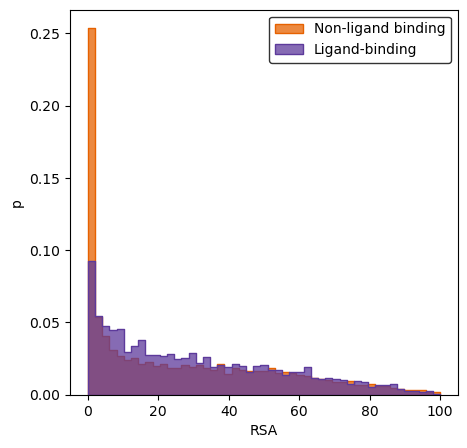

In [19]:
plot_distrs(d_rsa, "RSA", labels, bns_rsa, cols, show = True, dpi = 100)#, figsize = (7.5, 7.5), out = os.path.join(main_dir, "NLB_vs_LB_RSA.png"))

In [20]:
run_tests(d_rsa)

Anderson-Darling 2 sample test:
A statistic = 151.19	p < 0.001

Kolmogorov-Smirnov two sample test result:
KS statistic = 0.17	p = 0.0

Mann-Whitney U rank test result:
U = 9541089.5	p = 0.0

T-test result:
T = -6.49	p = 0.0


/Users/2394007/Documents/PHD/LOCAL/FRAGSYS_DEF/fragsys_analysis.py:165: UserWarning: p-value floored: true value smaller than 0.001
  A, cvs, p = scipy.stats.anderson_ksamp([a, b])


There is a very significant difference between the RSA distributions of NLB and LB residues. NLB present a much higher proportion of highly buried residues. This corresponds to the most buried regions of the hydrophobic core of proteins too where no molecules can bind at all.

## NORMALISED SHENKIN DIVERGENCE SCORE

In here, we compare non-ligand-binding (NLB) and ligand-binding (LB) residues in terms of their evolutionary divergence, measured by a normalised version of the Shenkin divergence score. Divergence is directly measured from the multiple sequence alignment. To make sure these scores were meaningful. We only took those residues aligned in columns with at least a column occupancy of 20 representing at least 50% of the total number of sequences, i.e., MSA with at least 20 sequences.

In [21]:
data_shenk = all_missense_df.query('occ >= 20 and occ_pct >= 0.5')

nlb_shenk = data_shenk.query('lab not in @bs_ress_labs').abs_norm_shenkin #1338
lb_shenk = data_shenk.query('lab in @bs_ress_labs').abs_norm_shenkin #574

d_shenk = [nlb_shenk, lb_shenk]

bns_shenk = np.linspace(0, 100, 50)

print(len(nlb_shenk), len(lb_shenk))

1338 574


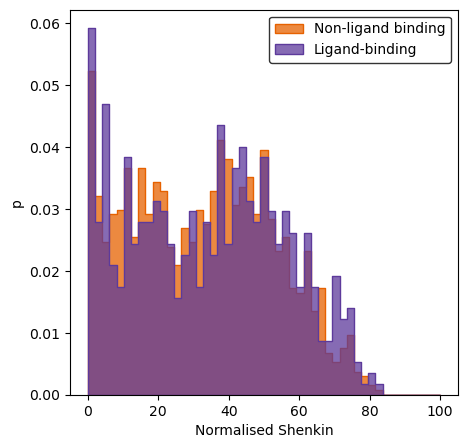

In [22]:
plot_distrs(d_shenk, "Normalised Shenkin", labels, bns_shenk, cols, show = True, dpi = 100)#, figsize = (7.5,7.5), out = os.path.join(main_dir, "NLB_vs_LB_Abs_Norm_Shenkin.png"))

In [23]:
run_tests(d_shenk)

Anderson-Darling 2 sample test:
A statistic = 1.22	p = 0.102

Kolmogorov-Smirnov two sample test result:
KS statistic = 0.05	p = 0.21

Mann-Whitney U rank test result:
U = 369387.0	p = 0.19

T-test result:
T = -1.41	p = 0.16


No difference was observed in terms of evolutionary divergence between NLB and LB residues.

## MISSENSE ENRICHMENT SCORE

In here, we compare non-ligand-binding (NLB) and ligand-binding (LB) residues in terms of their missense enrichment score (MES). MES is affected by the amount of variants mapped to each column. This of course depends on the functional constraint acting upon each position, of course, but it is also dependent on other factors. For example, the number of sequences within the alignment, and specifically the number of human homologues. For this reason, we apply a filtering and remove those residues found in columns populated by fewer than 25 sequences, with a column occupancy smaller than 50% and 5 variants mapped to them.

In [24]:
data_mes = all_missense_df.query('occ >= 25 and occ_pct >= 0.50 & variants >= 1')

a_mes = data_mes.query('lab not in @bs_ress_labs').log_oddsratio # 7744 --> 1087
b_mes = data_mes.query('lab in @bs_ress_labs').log_oddsratio  # 2664 --> 528

bns_mes = np.linspace(-1.5, 0.75, 50)

d_mes = [a_mes, b_mes]

print(len(a_mes), len(b_mes))

1087 528


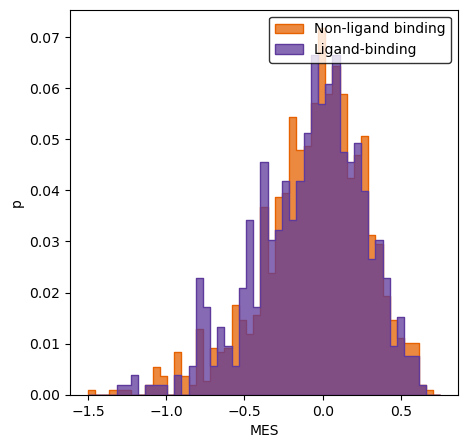

In [25]:
plot_distrs(d_mes, "MES", labels, bns_mes, cols, show = True, dpi = 100)#, figsize = (7.5,7.5), out = os.path.join(main_dir, "NLB_vs_LB_MES.png"))

In [26]:
run_tests(d_mes)

Anderson-Darling 2 sample test:
A statistic = 0.53	p = 0.2

Kolmogorov-Smirnov two sample test result:
KS statistic = 0.05	p = 0.22

Mann-Whitney U rank test result:
U = 298983.5	p = 0.17

T-test result:
T = 1.39	p = 0.16


Just like in the case of evolutioanry divergence, the differences between MES distributions between NLB and LB residues were not significant.